# K-Means

## Notation

- $m$ - Number of training examples.
- $x^{(i)}$ - The $i^{th}$ training example.
- $K$ - Number of cluster centroids.
- $c^{(i)}$ - The index of the $k^{th}$ cluster which example $x^{(i)}$ is assigned.
- $\mu_k$ - The $k^{th}$ cluster centroid.
- $\mu_{c^{(i)}}$ - Cluster centroid to which example $x^{(i)}$ has been assigned.

## Formulas

### Cost Function

$J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_k) = \frac{1}{m} \sum^{m}_{i = 1} \Vert x^{(i)} - \mu_{c^{(i)}} \Vert^2$

### Optimization Steps

1. Assign points to the closest cluster centroid.
2. Move cluster centroids to the mean location of its points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## K-Means Implementation

In [2]:
class KMeans:
    def __init__(self, n_clusters=5, n_iters=100):
        self.n_clusters = n_clusters
        self.n_iters = n_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.n_iters):
            self.labels = self._assign_clusters(X)
            self.centroids = self._calculate_centroids(X)
        return self
    
    def predict(self, X):
        return self._assign_clusters(X)

    def _assign_clusters(self, X):
        indices = np.zeros(X.shape[0])
        for i in range(len(X)):
            indices[i] = np.argmin([np.linalg.norm(X[i] - mu) for mu in self.centroids])
        return indices

    def _calculate_centroids(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

## Basic Clustering

### Generate Clusters

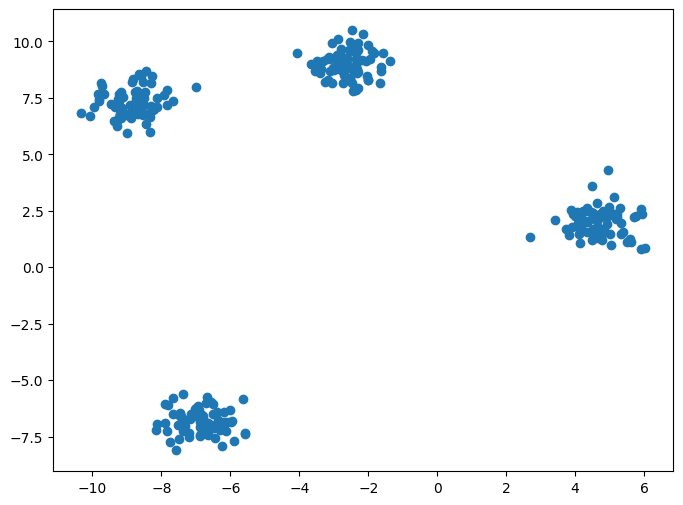

In [3]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Cluster with K-Means

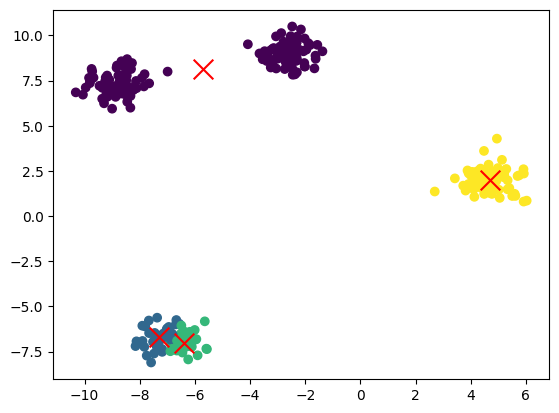

In [4]:
kmeans = KMeans(n_clusters=4, n_iters=100)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='x')
plt.show()